In [1]:
import pydot

In [2]:
g = pydot.Dot()
g.set_type('digraph')
node = pydot.Node('legend')
node.set("shape", 'box')
g.add_node(node)
node.set('label','1:mine')

In [3]:
g.to_string()

'digraph G {\nlegend [shape=box, label=1:mine];\n}\n'

In [4]:
import theano as th
import theano.tensor as T
import numpy as np

In [5]:
import theano.d3viz as d3v
from IPython.display import IFrame

In [6]:
from theano.printing import pydotprint
import os
from IPython.display import Image

In [7]:
from theano.d3viz.formatting import PyDotFormatter

In [8]:
ninputs = 1000
nfeatures = 100
noutputs = 10
nhiddens = 50

rng = np.random.RandomState(0)
x = T.dmatrix('x')
wh = th.shared(rng.normal(0, 1, (nfeatures, nhiddens)), borrow=True)
bh = th.shared(np.zeros(nhiddens), borrow=True)
h = T.nnet.sigmoid(T.dot(x, wh) + bh)

wy = th.shared(rng.normal(0, 1, (nhiddens, noutputs)))
by = th.shared(np.zeros(noutputs), borrow=True)
y = T.nnet.softmax(T.dot(h, wy) + by)

predict = th.function([x], y)

In [9]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')
pydotprint(predict, 'tmp/test.png')

The output file is available at tmp/test.png


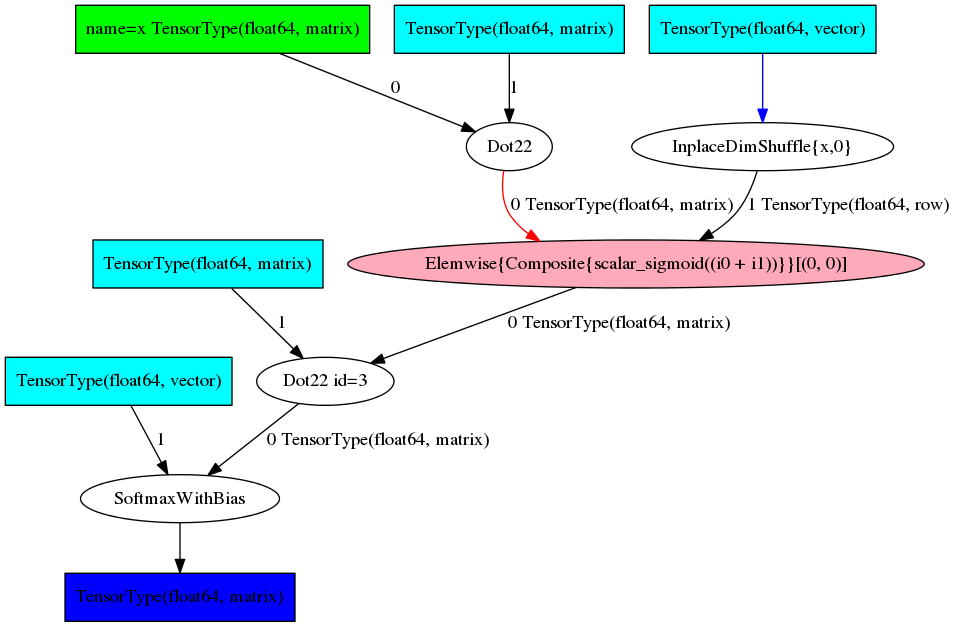

In [10]:
Image('./tmp/test.png', width='80%')

In [11]:
reload(d3v)

<module 'theano.d3viz' from '/home/stephan/GitProjects/Theano/theano/d3viz/__init__.pyc'>

In [12]:
d3v.d3viz(predict, 'tmp/test.html')
IFrame('tmp/test.html', width=700, height=500)

# profiling

In [17]:
predict_profiled = th.function([x], y, mode="FAST_RUN", on_unused_input="ignore", profile=True)

x_val = rng.normal(0, 1, (ninputs, nfeatures))
y_val = predict_profiled(x_val)

In [18]:
d3v.d3viz(predict_profiled, 'tmp/test2.html')
IFrame('tmp/test2.html', width=700, height=500)

# subgraphs

In [19]:
x, y, z = T.scalars('xyz')
e = T.nnet.sigmoid((x + y + z)**2)
op = th.OpFromGraph([x, y, z], [e])

e2 = op(x, y, z) + op(z, y, x)
f = th.function([x, y, z], e2)

In [20]:
d3v.d3viz(f, 'tmp/ofg.html')
IFrame('tmp/ofg.html', width=700, height=500)

In [21]:
x, y, z = T.scalars('xyz')
e = x * y
op = th.OpFromGraph([x, y], [e])
e2 = op(x, y) + z
op2 = th.OpFromGraph([x, y, z], [e2])
e3 = op2(x, y, z) + z
f = th.function([x, y, z], [e3])

In [22]:
d3v.d3viz(f, 'tmp/ofg2.html')
IFrame('tmp/ofg2.html', width=700, height=500)